Importing modules

In [1]:
import numpy as np
import cv2
import glob

# This is a value for the termination criterion of the subpixel corner localizer
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

Creation of the 3D point coordinates and loading images

In [2]:
# Here you have 3D points for the checkerboard (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)
# Here you load the image files
images = glob.glob('left*.jpg')

print(images)


['left1.jpg', 'left11.jpg', 'left12.jpg', 'left13.jpg', 'left14.jpg', 'left2.jpg', 'left3.jpg', 'left4.jpg', 'left5.jpg', 'left6.jpg', 'left7.jpg', 'left8.jpg', 'left9.jpg']


Cell 1

In [3]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
for fname in images:
    #reading an image
    img = cv2.imread(fname)
    # transforming the image to gray scale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        
print(gray)

[[ 0  0  1 ...  0  0  4]
 [ 0  1  3 ...  4  5  8]
 [ 2  3  5 ...  9  6  3]
 ...
 [11 37 40 ... 48 40  1]
 [10 34 34 ... 55 51 17]
 [ 0 11  9 ... 16 17  0]]


Cell 2

In [4]:
retval, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)



In [5]:
print("rotation vector size",len(rvecs))

rotation vector size 11


In [6]:
for rvec in rvecs:
    R,jacobian=cv2.Rodrigues(rvec)
    print(jacobian)
    print("\n")

[[-1.71567758e-01  1.87263569e-01 -5.95662314e-01 -8.66156342e-02
   2.92013665e-03  1.00149201e-03 -6.18367988e-01 -2.92546038e-02
   1.72145599e-01]
 [-3.01348673e-03 -1.68243202e-01 -1.68040168e-02 -6.07150468e-03
   1.02874559e-01 -6.33860496e-01 -1.14490950e-02 -6.11154822e-01
  -1.01932325e-01]
 [ 3.63491234e-02  9.59898087e-01  1.63153958e-01 -9.88151199e-01
   2.08566158e-02  8.83447305e-02  9.82260643e-04 -1.85534473e-01
  -3.22219819e-02]]


[[-6.20737374e-02  4.53221692e-02 -6.34147649e-01 -2.35518525e-01
   2.18575575e-01 -5.72805534e-01 -5.90532272e-01  5.91631924e-01
   2.77725519e-01]
 [ 1.51681237e-01 -4.29434977e-02  6.08267728e-01 -2.36400941e-01
  -4.38747621e-02 -5.97713045e-01 -5.89441337e-01 -6.41328423e-01
   1.91311551e-01]
 [ 9.76679941e-01  1.83754907e-02 -1.77250997e-01  4.50899835e-04
   9.69499168e-01  8.49524830e-02  1.62064465e-02 -1.95888212e-01
  -2.01493544e-02]]


[[ 0.07148307  0.05376496 -0.68910036  0.30683827 -0.15513357 -0.44937011
  -0.61935471 

In [7]:
Rm=[]
for rvec in rvecs:
    R,jacobian=cv2.Rodrigues(rvec)
    Rm.append(R)
    print(R)
    print("\n")
    
print(Rm)
print(len(Rm))

[[-0.96172702 -0.01012322  0.27382232]
 [-0.03510698 -0.98652886 -0.1597758 ]
 [ 0.27175107 -0.16327378  0.94841606]]


[[-0.00572681  0.99739943  0.07184414]
 [-0.92863032 -0.03195676  0.3696275 ]
 [ 0.37096216 -0.06459986  0.92639837]]


[[-0.30887909  0.9501694   0.04209285]
 [-0.83758618 -0.25077985 -0.48534406]
 [-0.45060304 -0.18516902  0.87330941]]


[[ 0.14620389 -0.89550824 -0.4203444 ]
 [ 0.96337408  0.22544365 -0.14520858]
 [ 0.22479946 -0.38371885  0.89567017]]


[[ 0.09449387  0.97566706  0.19785017]
 [-0.75316188  0.20002654 -0.62668698]
 [-0.65101313 -0.08979513  0.75373652]]


[[-0.92086474  0.36672175  0.13237558]
 [-0.31481472 -0.89968619  0.30241768]
 [ 0.22999962  0.23681199  0.94393869]]


[[-0.97102471  0.01119766  0.23871662]
 [ 0.01646123 -0.99339509  0.11355711]
 [ 0.23841149  0.11419633  0.96442686]]


[[-0.19398737  0.97117073  0.13855077]
 [-0.86334948 -0.23607533  0.44597771]
 [ 0.46582892 -0.03310369  0.88425537]]


[[ 0.09035979  0.89591846  0.43493129]
 

Camera matrix refinement

In [8]:
img = cv2.imread('left12.jpg')
h,  w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

Cell 3

In [9]:
# 1
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult1.png',dst)


# 2
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult2.png',dst)

True

Cell 4

In [10]:
tot_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error

print("total error: ", tot_error/len(objpoints))

total error:  0.023686000375385673


# Part B

# # 1

Load teapot point cloud coordinates

In [11]:
import pandas as pd
import matplotlib.animation

In [12]:
# Load from text file
tp= np.loadtxt("teapot.txt",usecols=range(3))
# Number of points in the cloud
n_points = np.shape(tp)
# Transpose and add a fourth coordinate with unitary value 
# (homogeneous coordinates)
tp = np.hstack((tp,np.ones((n_points[0],1),dtype=np.float))).T
# Save it in a data frame
df = pd.DataFrame({"x" : tp[0,:], "y" :tp[1,:], "z" : tp[2,:], 
                                                "w": tp[3,:]})

In [13]:
# Scaling matrix
def scaling_matrix(s):
    # Scales are given in numpy array s
    # s=np.array([s_x,s_y,s_z])
    
    # Write the scaling matrix here
    S = np.identity(4)
    S[:3, :3] = np.diag(s)
    
    return S

# Translation matrix
def translation_matrix(t):
    # Translation vector is given in numpy array t
    # t=np.array([t_x,t_y,t_z])
    
    # Write the translation matrix here
    T = np.identity(4)
    T[:3, 3] = t
    
    return T

# Rotation matrix
def rotation_matrix(theta, v):
    # Axis for rotation (unit norm vector) is given 
    # is given in numpy array v
    # v=np.array([v_x,v_y,v_z])
    # Rotation angle is given in theta
    
    # Write the rotation matrix here
    st = np.sin(theta)
    ct = np.cos(theta)
    o_ct = 1-ct
    vx2= v[0]**2
    vy2= v[1]**2
    vz2= v[2]**2
    vxy = v[0]*v[1]
    vxz = v[0]*v[2]
    vyz= v[1]*v[2]
    # Rotation
    R = [[ct+vx2*o_ct, vxy*o_ct-v[2]*st, vxz*o_ct+v[1]*st],
         [vxy*o_ct+v[2]*st, ct+vy2*o_ct, vyz*o_ct-v[0]*st],
         [vxz*o_ct-v[1]*st, vyz*o_ct+v[0]*st, ct+vz2*o_ct]]
    R_v = np.identity(4)
    R_v[:3, :3] = R
    
    return R_v

mtx : intrinsic matrix (Mint)
R: rotation matrix
t: translation matrix

[R t] : extrinsic matrix (Mext)


Camera matrix= Mint Mext

In [14]:
Mext=[]
for i in range(len(Rm)):
    Rt_matrix = np.concatenate((Rm[i],tvecs[i]), axis=1)
    Mext.append(Rt_matrix)
    print(Rt_matrix)
    print("\n")

[[-9.61727018e-01 -1.01232220e-02  2.73822321e-01  3.79739146e+00]
 [-3.51069793e-02 -9.86528861e-01 -1.59775803e-01  8.98950175e-01]
 [ 2.71751068e-01 -1.63273781e-01  9.48416063e-01  1.48593055e+01]]


[[-5.72680869e-03  9.97399430e-01  7.18441363e-02 -2.89985494e+00]
 [-9.28630323e-01 -3.19567624e-02  3.69627499e-01  2.62066993e+00]
 [ 3.70962163e-01 -6.45998576e-02  9.26398366e-01  1.05769926e+01]]


[[-0.30887909  0.9501694   0.04209285 -1.22339632]
 [-0.83758618 -0.25077985 -0.48534406  3.52139948]
 [-0.45060304 -0.18516902  0.87330941 15.67311789]]


[[ 0.14620389 -0.89550824 -0.4203444   1.81888151]
 [ 0.96337408  0.22544365 -0.14520858 -4.2642919 ]
 [ 0.22479946 -0.38371885  0.89567017 12.45728517]]


[[ 0.09449387  0.97566706  0.19785017 -2.12419184]
 [-0.75316188  0.20002654 -0.62668698  1.84550818]
 [-0.65101313 -0.08979513  0.75373652 12.81229187]]


[[-0.92086474  0.36672175  0.13237558  3.03685642]
 [-0.31481472 -0.89968619  0.30241768  2.74656588]
 [ 0.22999962  0.23681

In [15]:
import numpy

In [16]:
Ms=[]
for i in range(len(mtx)):
    M=numpy.matmul(mtx,Mext)
    Ms.append(M)
    print(M)

[[[-4.20818148e+02 -6.11700780e+01  4.70156932e+02  7.10303538e+03]
  [ 4.45519202e+01 -5.64957870e+02  1.35590083e+02  3.94155712e+03]
  [ 2.71751068e-01 -1.63273781e-01  9.48416063e-01  1.48593055e+01]]

 [[ 1.23637697e+02  5.10618942e+02  3.54766471e+02  2.06367529e+03]
  [-4.09585212e+02 -3.21169746e+01  4.13225596e+02  3.86361442e+03]
  [ 3.70962163e-01 -6.45998576e-02  9.26398366e-01  1.05769926e+01]]

 [[-3.18859623e+02  4.44216282e+02  3.20745489e+02  4.69952348e+03]
  [-5.52336834e+02 -1.77080640e+02 -5.57979247e+01  5.53183156e+03]
  [-4.50603040e-01 -1.85169023e-01  8.73309414e-01  1.56731179e+01]]

 [[ 1.54859915e+02 -6.09317938e+02  8.14081749e+01  5.22599903e+03]
  [ 5.66922600e+02  3.10281350e+01  1.31083786e+02  6.24230476e+02]
  [ 2.24799463e-01 -3.83718847e-01  8.95670167e-01  1.24572852e+01]]

 [[-1.71876742e+02  4.90407274e+02  3.63092722e+02  3.24136525e+03]
  [-5.53928856e+02  8.59206215e+01 -1.59145870e+02  3.97028895e+03]
  [-6.51013132e-01 -8.97951290e-02  7.53

In [17]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [18]:
def update_graph(num):
    # Load point cloud from data frame
    tp=np.vstack((df['x'],df['y'],df['z'],df['w']))
    #angle = num*0.01
    # Create uniform scaling matrix 
    M = scaling_matrix([0.5,0.5,0.5])
    M = scaling_matrix([1.0,1.0,-1.0])
    tp_r = np.dot(M,tp)
    graph._offsets3d = (tp_r[0,:], tp_r[1,:], tp_r[2,:])
    return graph

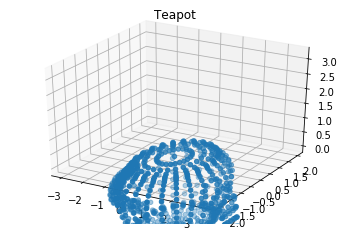

In [19]:
# 3D figure generation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('Teapot')

# 3D scatter plot
graph = ax.scatter(tp[0,:], tp[1,:], tp[2,:])
# # Change axis limits if necessary
# ax.set_xlim3d(-8, 8)
# ax.set_ylim3d(-8, 8)
# ax.set_zlim3d(-1, 8)

# Animation function
ani = matplotlib.animation.FuncAnimation(fig, update_graph,1000, 
                                            interval=1, blit=False)


plt.show()

In [ ]:
img=mpimg.imread('left1.jpg')
fig,ax = plt.subplots()
ax.imshow(img)